In [24]:
# 다항 회귀
# - 데이터가 단순한 직선 형태가 아닌 비선형의 형태를 갖고 있을 때, 각 변수의 거듭제곱을 새로운 변수로 추가하면 선형 모델을 사용 가능
# - 이렇게 확장된 특성을 데이터세트에 선형 모델로 훈련시키는 기법이 다항회귀

In [25]:
import pandas as pd
## 시리얼 데이터 로드
cereal = pd.read_csv('../data/cereal.csv')
cereal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      77 non-null     object 
 1   mfr       77 non-null     object 
 2   type      77 non-null     object 
 3   calories  77 non-null     int64  
 4   protein   77 non-null     int64  
 5   fat       77 non-null     int64  
 6   sodium    77 non-null     int64  
 7   fiber     77 non-null     float64
 8   carbo     77 non-null     float64
 9   sugars    77 non-null     int64  
 10  potass    77 non-null     int64  
 11  vitamins  77 non-null     int64  
 12  shelf     77 non-null     int64  
 13  weight    77 non-null     float64
 14  cups      77 non-null     float64
 15  rating    77 non-null     float64
dtypes: float64(5), int64(8), object(3)
memory usage: 9.8+ KB


In [26]:
# 불필요한 컬럼은 제거하고 sugar가 0이상인 데이터만 출력
cereal = cereal[cereal.columns[3:]]
cereal = cereal[cereal.sugars >= 3]
cereal

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
4,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843
5,110,2,2,180,1.5,10.5,10,70,25,1,1.0,0.75,29.509541
...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,110,2,1,250,0.0,21.0,3,60,25,3,1.0,0.75,39.106174
73,110,1,1,140,0.0,13.0,12,25,25,2,1.0,1.00,27.753301
74,100,3,1,230,3.0,17.0,3,115,25,1,1.0,0.67,49.787445
75,100,3,1,200,3.0,17.0,3,110,25,1,1.0,1.00,51.592193


C:\Users\juno\AppData\Local\Temp\ipykernel_35112\357517442.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cereal2.sort_values(by=['sugars'], inplace =True)


<function matplotlib.pyplot.show(close=None, block=None)>

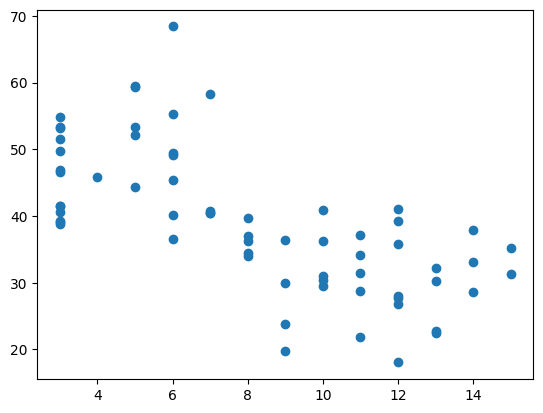

In [27]:
# 설탕 함유량에 따른 양향등급평가 다항 회귀
# 두 변수의 관계를 확인하기 위해 그래프 시각화
import matplotlib.pyplot as plt
cereal2 = cereal[['sugars', 'rating']]
cereal2.sort_values(by=['sugars'], inplace =True)
cereal2.reset_index(drop=True, inplace =True)
x=cereal2['sugars'].values
y=cereal2['rating'].values
plt.scatter(x,y)
plt.show

In [28]:
## 데이터의 분할
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size =0.3, random_state =1)
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(45,) (20,)
(45,) (20,)


In [29]:
## PolynomialFeatures로 2차 다항식 조건 생성
## x_poly는 교차항과 2차항을 포함한 데이터로 변환
## LinearRegression으로 데이터 학습
from sklearn.preprocessing import PolynomialFeatures
## degree는 다항식의 차수를 결정(2차 방정식, 3차 방정식 ...)
poly_reg=PolynomialFeatures(degree=2)
## 데이터를 적합시킨뒤 변환
X_poly=poly_reg.fit_transform(X_train.reshape(-1,1))

from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_poly, y_train)

LinearRegression()

In [30]:
# 데이터를 다항 변수로 변환
import numpy as np
X_test_poly=poly_reg.transform(X_test.reshape(-1,1))
pred=reg.predict(X_test_poly)

np.set_printoptions(precision=2) # 소수점 둘째자리까지 표현
print(np.concatenate((pred.reshape(len(pred),1), y_test.reshape(len(y_test),1)),1))

[[32.33 41.02]
 [32.33 39.26]
 [33.91 28.74]
 [48.29 46.9 ]
 [33.91 21.87]
 [32.33 26.73]
 [42.53 68.4 ]
 [40.71 58.35]
 [33.91 31.44]
 [35.53 30.45]
 [37.21 36.47]
 [35.53 29.51]
 [27.89 31.23]
 [37.21 23.8 ]
 [40.71 40.69]
 [30.8  22.74]
 [32.33 28.03]
 [48.29 53.37]
 [38.93 36.19]
 [42.53 40.11]]


In [31]:
# 성능평가지표를 이용해서 모델의 예측력 평가
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
mse = mean_squared_error(y_test,pred)
mae = mean_absolute_error(y_test, pred)
r2 = r2_score(y_test,pred)
rmse = np.sqrt(mse)
acc = reg.score(poly_reg.transform(X_test.reshape(-1,1)), y_test)

print(mse, mae, r2, rmse, acc)

84.56786638013027 6.850720812732595 0.4118750308600795 9.196078858955607 0.4118750308600795


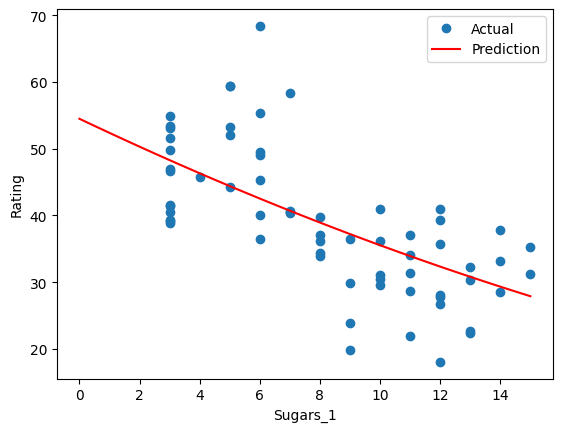

In [32]:
##  다항회귀분석 시각화
X_new=np.linspace(0,15,100).reshape(100,1)
X_new_poly=poly_reg.transform(X_new)
y_new = reg.predict(X_new_poly)

plt.plot(x,y, 'o', label ='Actual')
plt.plot(X_new, y_new, 'r-', label ='Prediction')
plt.legend()
plt.xlabel('Sugars_1')
plt.ylabel('Rating')
plt.show()

In [65]:
X = cereal.iloc[:,:-1].values
y = cereal.iloc[:,-1].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.3, random_state =1)
print (X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(45, 12) (20, 12) (45,) (20,)


In [66]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train) 
X_test = sc.transform(X_test)

from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=2)

from sklearn.linear_model import LinearRegression
X_poly = poly_reg.fit_transform(X_train)
reg = LinearRegression()
reg.fit(X_poly, y_train)

LinearRegression()

In [67]:
import numpy as np
X_test_poly = poly_reg.transform(X_test)
pred = reg.predict(X_test_poly)

from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_squared_error
mse = mean_squared_error(y_test, pred)
mae = mean_absolute_error(y_test, pred)
rmse = np.sqrt(mse)
acc = reg.score(poly_reg.transform(X_test), y_test)
print('MSE\t{}'.format(round(mse,3)))
print('MAE\t{}'.format(round(mae,3)))
print('RMSE\t{}'.format(round(rmse,3)))
print('ACC\t{}%'.format(round(acc *100,3)))

MSE	9.004
MAE	2.34
RMSE	3.001
ACC	90.6%
